In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines.datasets import load_lung, load_rossi
from lifelines import  KaplanMeierFitter, CoxPHFitter, WeibullAFTFitter, LogLogisticAFTFitter, LogNormalAFTFitter


# **2- Key Concepts in Survival Analysis**

# **Survival Function**

In [3]:
# Time points
time = np.linspace(0, 20, 100)

In [19]:
# Different survival functions
survival_exp = np.exp(-0.1 * time)  # Exponential decay
survival_weibull = np.exp(-0.05 * time**1.5)  # Weibull-like decay
survival_logistic = 1 / (1 + np.exp(0.2 * (time - 10)))  # Logistic-shaped survival curve
survival_flat = np.maximum(1 - 0.05 * time, 0)  # Linear decay (capped at 0)

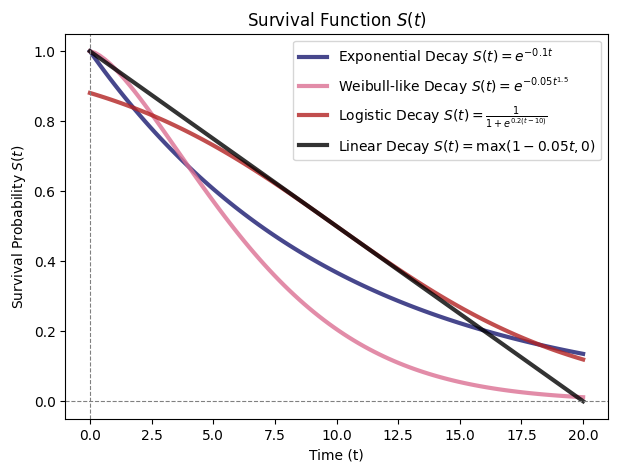

In [35]:
# Plot the survival function
plt.figure(figsize=(7, 5))
plt.plot(time, survival_exp, linewidth=3, alpha=0.8, label="Exponential Decay $S(t) = e^{-0.1t}$", color="midnightblue")
plt.plot(time, survival_weibull,linewidth=3, alpha=0.8, label="Weibull-like Decay $S(t) = e^{-0.05t^{1.5}}$", color="palevioletred")
plt.plot(time, survival_logistic, linewidth=3, alpha=0.8, label="Logistic Decay $S(t) = \\frac{1}{1+e^{0.2(t-10)}}$", color="firebrick")
plt.plot(time, survival_flat, linewidth=3, alpha=0.8, label="Linear Decay $S(t) = \\max(1 - 0.05t, 0)$", color="black")

# Labels and legend
plt.xlabel("Time (t)")
plt.ylabel("Survival Probability $S(t)$")
plt.title("Survival Function $S(t)$")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(visible=False)
plt.show()

# **Hazard Function**

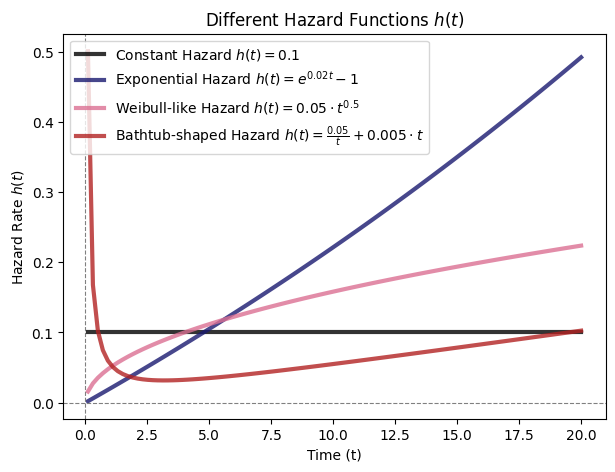

In [ ]:

# Time points
time = np.linspace(0.1, 20, 100)  # Start at 0.1 to avoid issues with division by zero

# Different hazard functions
hazard_constant = np.full_like(time, 0.1)  # Constant hazard
hazard_exponential = np.exp(0.02 * time) - 1  # Exponentially increasing hazard
hazard_weibull = 0.05 * time**0.5  # Weibull-like hazard (increasing with sqrt(t))
hazard_bathtub = 0.05 / time + 0.005 * time  # U-shaped (high early, low middle, increasing later)

# Plot the hazard functions
plt.figure(figsize=(7, 5))
plt.plot(time, hazard_constant, linewidth=3, alpha=0.8, label="Constant Hazard $h(t) = 0.1$", color="black")
plt.plot(time, hazard_exponential, linewidth=3, alpha=0.8, label="Exponential Hazard $h(t) = e^{0.02t} - 1$", color="midnightblue")
plt.plot(time, hazard_weibull, linewidth=3, alpha=0.8, label="Weibull-like Hazard $h(t) = 0.05 \\cdot t^{0.5}$", color="palevioletred")
plt.plot(time, hazard_bathtub, linewidth=3, alpha=0.8, label="Bathtub-shaped Hazard $h(t) = \\frac{0.05}{t} + 0.005 \\cdot t$", color="firebrick")

# Labels and legend
plt.xlabel("Time (t)")
plt.ylabel("Hazard Rate $h(t)$")
plt.title("Different Hazard Functions $h(t)$")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(visible=False)
plt.show()

# **Censoring**

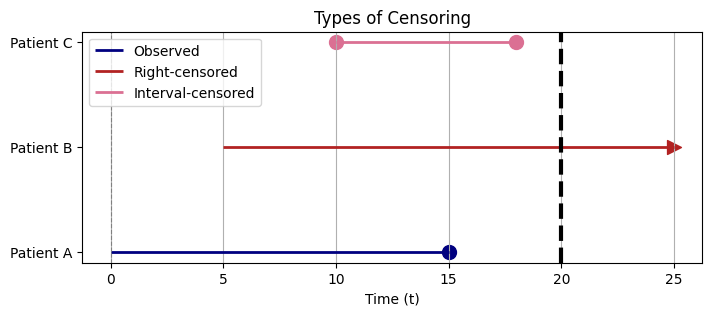

In [62]:
# Example data for censoring
patients = ['Patient A', 'Patient B', 'Patient C']
start_times = [0, 5, 10]  # Start times
end_times = [15, np.nan, 18]  # End times, np.nan represents no event observed (censoring)
censoring_types = ['Observed', 'Right-censored', 'Interval-censored']

# Create the plot
plt.figure(figsize=(8, 3))
for i, (start, end, ctype) in enumerate(zip(start_times, end_times, censoring_types)):
    if np.isnan(end):  # Right-censored
        plt.hlines(i, start, 25, colors='firebrick', linewidth=2, label='Right-censored' if i == 1 else None)
        plt.scatter(25, i, color='firebrick', marker='>', s=100)
    elif ctype == 'Interval-censored':  # Interval-censored
        plt.hlines(i, start, end, colors='palevioletred', linewidth=2, label='Interval-censored' if i == 2 else None)
        plt.scatter([start, end], [i, i], color='palevioletred', marker='o', s=100)
    else:  # Observed
        plt.hlines(i, start, end, colors='navy', linewidth=2, label='Observed' if i == 0 else None)
        plt.scatter(end, i, color='navy', marker='o', s=100)

plt.yticks(range(len(patients)), patients)
plt.xlabel("Time (t)")
plt.title("Types of Censoring")
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend(loc='upper left')
plt.grid(axis='x')
plt.axvline(20, color='black', linestyle='--', linewidth=3)
plt.show()

# **3- Types of Survival Analysis Models**

# **Kaplan-Meier Estimator**

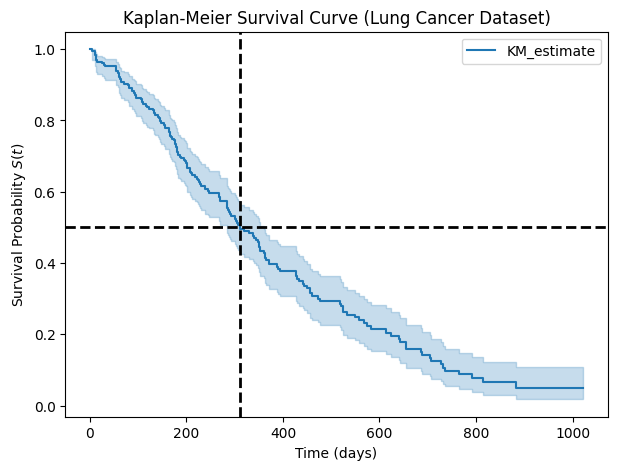

Median Survival Time: 310.0 days
Survival Probabilities:
     timeline  KM_estimate
0         0.0     1.000000
1         5.0     0.995614
2        11.0     0.982456
3        12.0     0.978070
4        13.0     0.969298
..        ...          ...
182     840.0     0.067127
183     883.0     0.050346
184     965.0     0.050346
185    1010.0     0.050346
186    1022.0     0.050346

[187 rows x 2 columns]


In [70]:

# Load the lung cancer dataset
data = load_lung()

# Extract relevant columns
# 'time': survival times
# 'status': event indicator (1 = event occurred, 0 = censored)
survival_times = data['time']
event_observed = data['status']

# Kaplan-Meier Fitter
kmf = KaplanMeierFitter()
kmf.fit(survival_times, event_observed)

# Plot Kaplan-Meier Survival Curve
plt.figure(figsize=(7, 5))
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve (Lung Cancer Dataset)")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability $S(t)$")
plt.grid(visible=False)
plt.axhline(0.5, color='black', linestyle='--', linewidth=2)
plt.axvline(310, color='black', linestyle='--', linewidth=2)
plt.show()

# Output Key Metrics
median_survival = kmf.median_survival_time_
survival_probabilities = kmf.survival_function_.reset_index()

print(f"Median Survival Time: {median_survival} days")
print("Survival Probabilities:")
print(survival_probabilities)  # Display the first few rows

In [71]:
data

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,1,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,0,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,1,60,1,0.0,100.0,90.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
223,1.0,188,0,77,1,1.0,80.0,60.0,NaN,3.0
224,13.0,191,0,39,1,0.0,90.0,90.0,2350.0,-5.0
225,32.0,105,0,75,2,2.0,60.0,70.0,1025.0,5.0
226,6.0,174,0,66,1,1.0,90.0,100.0,1075.0,1.0


# **Cox Proportional Hazards Model**

<lifelines.CoxPHFitter: fitted with 167 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 120
   partial log-likelihood = -491.27
         time fit was run = 2025-01-04 19:25:21 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
inst      -0.03      0.97      0.01           -0.06           -0.00                0.95                1.00
age        0.01      1.01      0.01           -0.01            0.04                0.99                1.04
sex       -0.57      0.57      0.20           -0.96           -0.17                0.38                0.84
ph.ecog    0.91      2.48      0.24            0.44            1.38                1.55                3.96
ph.karno   0.03      1.03      0.01            0.00            0.05                1.00                1.05
pat.karno -0.01      0.99      0.01           -0.03            0.01                0.97                1.01
meal.cal   0.00      1.00      0.00           -0.00            0.00                1.00                1.00
wt.loss   -0.02      0.98      0.01           -0.03           -0.00                0.97                1.00

           cmp to     z      p  -log2(p)
covariate                               
inst         0.00 -2.31   0.02      5.60
age          0.00  1.07   0.28      1.82
sex          0.00 -2.81 <0.005      7.68
ph.ecog      0.00  3.80 <0.005     12.77
ph.karno     0.00  2.29   0.02      5.49
pat.karno    0.00 -1.34   0.18      2.47
meal.cal     0.00  0.01   0.99      0.01
wt.loss      0.00 -2.11   0.03      4.85
---
Concordance = 0.65
Partial AIC = 998.54
log-likelihood ratio test = 33.70 on 8 df
-log2(p) of ll-ratio test = 14.41

<Figure size 700x500 with 0 Axes>

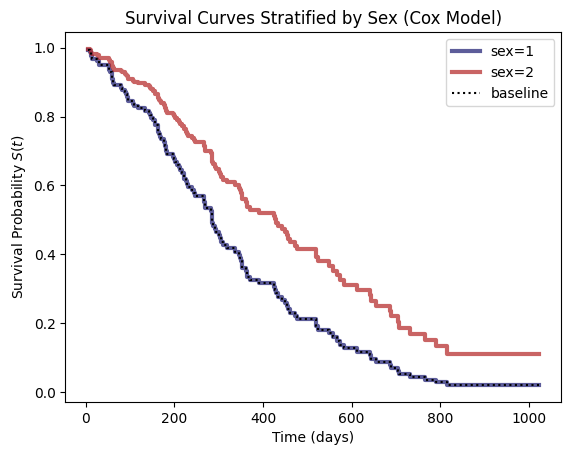

In [ ]:
# Load the lung cancer dataset
data = load_lung()

# Prepare the data: drop rows with missing values
data = data.dropna()

# Cox Proportional Hazards Model
cph = CoxPHFitter()
cph.fit(data, duration_col='time', event_col='status')

# Summary of the model
cph.print_summary()

# Plot survival curves stratified by a covariate (e.g., sex)
plt.figure(figsize=(7, 5))
cph.plot_covariate_groups('sex', values=[1, 2], alpha=0.7, linewidth=3, color=['midnightblue', 'firebrick'])  # Compare males (1) vs females (2)
plt.title("Survival Curves Stratified by Sex (Cox Model)")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability $S(t)$")
plt.grid(visible=False)
plt.show()

# **Accelerated Failure Time (AFT) Model**

<lifelines.WeibullAFTFitter: fitted with 167 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'status'
   number of observations = 167
number of events observed = 120
           log-likelihood = -824.16
         time fit was run = 2025-01-05 14:41:42 UTC

---
                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                  
lambda_ age       -0.01      0.99      0.01           -0.02            0.01                0.98                1.01
        inst       0.02      1.02      0.01            0.00            0.04                1.00                1.04
        meal.cal   0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        pat.karno  0.01      1.01      0.01           -0.00            0.02                1.00                1.02
        ph.ecog   -0.63      0.53      0.16           -0.94           -0.32                0.39                0.73
        ph.karno  -0.02      0.98      0.01           -0.03           -0.00                0.97                1.00
        sex        0.39      1.48      0.14            0.12            0.66                1.13                1.94
        wt.loss    0.01      1.01      0.01            0.00            0.02                1.00                1.02
        Intercept  7.17   1297.46      1.08            5.05            9.28              156.24            10774.49
rho_    Intercept  0.38      1.46      0.07            0.23            0.52                1.26                1.68

                   cmp to     z      p  -log2(p)
param   covariate                               
lambda_ age          0.00 -0.94   0.35      1.52
        inst         0.00  2.32   0.02      5.64
        meal.cal     0.00  0.04   0.97      0.05
        pat.karno    0.00  1.39   0.17      2.59
        ph.ecog      0.00 -3.95 <0.005     13.66
        ph.karno     0.00 -2.43   0.02      6.04
        sex          0.00  2.82 <0.005      7.70
        wt.loss      0.00  2.07   0.04      4.69
        Intercept    0.00  6.64 <0.005     34.86
rho_    Intercept    0.00  5.17 <0.005     22.02
---
Concordance = 0.65
AIC = 1668.32
log-likelihood ratio test = 33.82 on 8 df
-log2(p) of ll-ratio test = 14.48

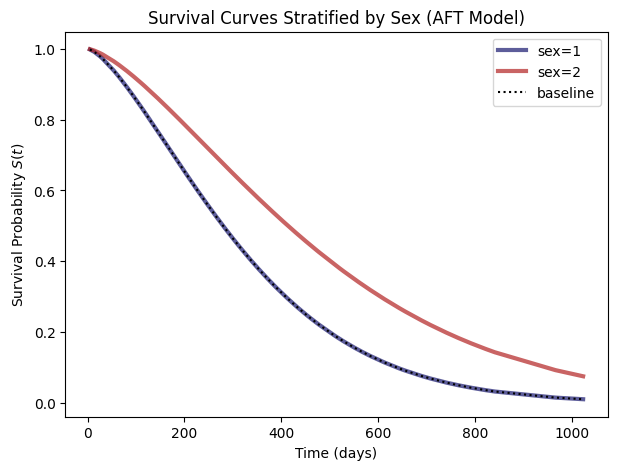

In [101]:

# Load the lung cancer dataset
data = load_lung()

# Prepare the data: drop rows with missing values
data = data.dropna()

# AFT (Weibull) Model
aft = WeibullAFTFitter()
aft.fit(data, duration_col='time', event_col='status')

# Summary of the AFT model
aft.print_summary()

# Plot survival curves based on covariates (e.g., sex)
plt.figure(figsize=(7, 5))

# Plot survival curves based on covariates (e.g., sex)
aft.plot_covariate_groups('sex', values=[1, 2], linewidth=3, alpha=0.7, color=['midnightblue', 'firebrick'])
plt.title("Survival Curves Stratified by Sex (AFT Model)")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability $S(t)$")
plt.grid(visible=False)
plt.show()


# **Competing Risks Analysis**

In [112]:
# Using R's BMT data:

''' 
dis ftime status
1    0    13      2
2    0     1      1
3    0    72      0
4    0     7      2
5    0     8      2
6    1    67      0
7    0     9      2
8    0     5      2
9    1    70      0
10   1     4      0
11   1     7      0
12   1    68      0
13   0     1      2
14   1    10      2
15   1     7      2
16   1     3      1
17   1     4      1
18   1     4      1
19   1     3      1
20   1     3      1
21   0    22      2
22   1     8      1
23   1     2      2
24   0     0      2
25   0     0      1
26   0    35      0
27   1    35      0
28   0     4      2
29   0    14      2
30   0    26      2
31   0     3      2
32   1     2      0
33   1     8      0
34   1    32      0
35   0    12      1
'''



'''

"CumIncidence" <- function(ftime, fstatus, group, t, strata, rho = 0, 
                           cencode = 0, subset, na.action = na.omit, level,
                           xlab = "Time", ylab = "Probability", 
                           col, lty, lwd, digits = 4)
{
  # check for the required package
  if(!require("cmprsk"))
  { stop("Package `cmprsk' is required and must be installed.\n 
           See help(install.packages) or write the following command at prompt
           and then follow the instructions:\n
           > install.packages(\"cmprsk\")") } 
  
  mf  <- match.call(expand.dots = FALSE)
  mf[[1]] <- as.name("list")
  mf$t <- mf$digits <- mf$col <- mf$lty <- mf$lwd <- mf$level <- 
    mf$xlab <- mf$ylab <- NULL
  mf <- eval(mf, parent.frame())
  g <- max(1, length(unique(mf$group)))
  s <- length(unique(mf$fstatus))
  if(missing(t)) 
  { time <- pretty(c(0, max(mf$ftime)), 6)
  ttime <- time <- time[time < max(mf$ftime)] }
  else { ttime <- time <- t }
  
  fit   <- do.call("cuminc", mf)
  tfit <- timepoints(fit, time)
  
  cat("\n+", paste(rep("-", 67), collapse=""), "+", sep ="")
  cat("\n| Cumulative incidence function estimates from competing risks data |")
  cat("\n+", paste(rep("-", 67), collapse=""), "+\n", sep ="")
  tests <- NULL
  if(g > 1)
  { 
    tests <- data.frame(fit$Tests[,c(1,3,2)], check.names = FALSE)
    colnames(tests) <- c("Statistic", "df", "p-value")
    tests$`p-value` <- format.pval(tests$`p-value`)
    cat("Test equality across groups:\n")
    print(tests, digits = digits) 
  }
  cat("\nEstimates at time points:\n")
  print(tfit$est, digits = digits)
  cat("\nStandard errors:\n")
  print(sqrt(tfit$var), digits = digits)
  
  if(missing(level))
  { 
    if(missing(t))
    { time <- sort(unique(c(ftime, time)))
    x <- timepoints(fit, time) }
    else x <- tfit
    col <- if(missing(col)) rep(1:(s-1), rep(g,(s-1))) else col
    lty <- if(missing(lty)) rep(1:g, s-1) else lty
    lwd <- if(missing(lwd)) rep(1, g*(s-1)) else lwd      
    matplot(time, base::t(x$est), type="s", ylim = c(0,1), 
            xlab = xlab, ylab = ylab, xaxs="i", yaxs="i", 
            col = col, lty = lty, lwd = lwd)
    legend("topleft", legend =  rownames(x$est), x.intersp = 2, 
           bty = "n", xjust = 1, col = col, lty = lty, lwd = lwd)
    out <- list(test = tests, est = tfit$est, se = sqrt(tfit$var))
  }
  else
  { if(level < 0 | level > 1) 
    error("level must be a value in the range [0,1]")
    
    oldpar <- par(ask=TRUE)
    on.exit(par(oldpar))
    if(missing(t))
    { time <- sort(unique(c(ftime, time)))
    x <- timepoints(fit, time) }
    else x <- tfit
    z <- qnorm(1-(1-level)/2)
    lower <- x$est ^ exp(-z*sqrt(x$var)/(x$est*log(x$est)))
    upper <- x$est ^ exp(z*sqrt(x$var)/(x$est*log(x$est)))
    col <- if(missing(col)) rep(1:(s-1), rep(g,(s-1))) 
    else             rep(col, g*(s-1))
    lwd <- if(missing(lwd)) rep(1, g*(s-1)) 
    else             rep(lwd, g*(s-1))      
    
    for(j in 1:nrow(x$est))
    { matplot(time, cbind(x$est[j,], lower[j,], upper[j,]), type="s", 
              xlab = xlab, ylab = ylab, xaxs="i", yaxs="i", 
              ylim = c(0,1), col = col[j], lwd = lwd[j], lty = c(1,3,3))
      legend("topleft", legend =  rownames(x$est)[j], bty = "n", xjust = 1) }
    
    i <- match(ttime, time)
    ci <- array(NA, c(2, length(i), nrow(lower)))
    ci[1,,] <- base::t(lower[,i])
    ci[2,,] <- base::t(upper[,i])
    dimnames(ci) <- list(c("lower", "upper"), ttime, rownames(lower))
    cat(paste("\n", level*100, "% pointwise confidence intervals:\n\n", sep=""))
    print(ci, digits = digits)
    out <- list(test = tests, est = x$est, se = sqrt(tfit$var), ci = ci)
  }
  
  invisible(out)
}
'''





'''
if(!require(cmprsk))
{ stop("the package 'cmprsk' is required, please install it. \nSee help(install.packages).") }

factor2ind <- function(x, baseline)
{
  #### dummy variable encoding ####
  xname <- deparse(substitute(x))
  n <- length(x)
  x <- as.factor(x)
  if(!missing(baseline)) x <- relevel(x, baseline)
  X <- matrix(0, n, length(levels(x)))
  X[(1:n) + n*(unclass(x)-1)] <- 1
  X[is.na(x),] <- NA
  dimnames(X) <- list(names(x), paste(xname, levels(x), sep = ":"))
  return(X[,-1,drop=FALSE])
}

modsel.crr <- function (object, ..., d = log(object$n)) 
{
  if(class(object) != "crr") 
    stop("object is not of class 'crr'")
  objects <- list(object, ...)
  nmodels <- length(objects)
  modnames <- paste("Model ", format(1:nmodels), ": ", 
                    lapply(objects, function(x) x$call), 
                    sep = "", collapse = "\n")
  
  mod0 <- object
  mod0$loglik <- mod0$loglik.null
  mod0$coef <- mod0$call$cov1 <- mod0$call$cov2 <- NULL
  objects <- c(list(mod0), objects)
  nmodels <- nmodels + 1
  
  modnames <- c("Model 0: Null model", modnames)
  ns <- sapply(objects, function(x) x$n) 
  dfs <- sapply(objects, function(x) length(x$coef)) 
  if(any(ns != ns[1]))
    stop("models were not all fitted to the same dataset")
  out <- matrix(rep(NA, 5 * nmodels), ncol = 5)
  loglik <- sapply(objects, function(x) x$loglik)
  crit <- sapply(objects, function(x) -2*x$loglik + d*length(x$coef))
  out[,1] <- ns
  out[,2] <- loglik
  out[,3] <- dfs
  out[,4] <- crit
  out[,5] <- crit - min(crit)
  if(d==log(object$n)) critname <- "BIC"
  else if(d == 2) critname <- "AIC"
  else critname <- "Criterion"
  colnames(out) <- c("Num.obs", "logLik", "Df.fit", critname, paste(critname, "diff"))
  rownames(out) <- 0:(nmodels-1)
  title <- "Model selection table\n"
  topnote <- modnames
  structure(as.data.frame(out), heading = c(title, topnote), 
            class = c("anova", "data.frame"))
}
'''

'\n\n"CumIncidence" <- function(ftime, fstatus, group, t, strata, rho = 0, \n                           cencode = 0, subset, na.action = na.omit, level,\n                           xlab = "Time", ylab = "Probability", \n                           col, lty, lwd, digits = 4)\n{\n  # check for the required package\n  if(!require("cmprsk"))\n  { stop("Package `cmprsk\' is required and must be installed.\n \n           See help(install.packages) or write the following command at prompt\n           and then follow the instructions:\n\n           > install.packages("cmprsk")") } \n  \n  mf  <- match.call(expand.dots = FALSE)\n  mf[[1]] <- as.name("list")\n  mf$t <- mf$digits <- mf$col <- mf$lty <- mf$lwd <- mf$level <- \n    mf$xlab <- mf$ylab <- NULL\n  mf <- eval(mf, parent.frame())\n  g <- max(1, length(unique(mf$group)))\n  s <- length(unique(mf$fstatus))\n  if(missing(t)) \n  { time <- pretty(c(0, max(mf$ftime)), 6)\n  ttime <- time <- time[time < max(mf$ftime)] }\n  else { ttime <- time

In [121]:
df = pd.read_csv('bmt_cif_summary.csv')
df.head()

,time_point,ALL1,AML1,ALL2,AML2,ALL1_lower,ALL1_upper,AML1_lower,AML1_upper,ALL2_lower,ALL2_upper,AML2_lower,AML2_upper
0,0,0.05882,0.00000,0.05882,0.00000,0.003487,0.242066,0.00000,0.00000,0.003487,0.242066,0.000000,0.000000
1,1,0.11760,0.00000,0.11760,0.00000,0.018190,0.318840,0.00000,0.00000,0.018190,0.318840,0.000000,0.000000
2,2,0.11765,0.00000,0.11765,0.05556,0.018190,0.318840,0.00000,0.00000,0.018190,0.318840,0.003365,0.230594
3,3,0.11765,0.17708,0.17647,0.05556,0.018190,0.318840,0.04105,0.39118,0.041010,0.389820,0.003365,0.230594
4,4,0.11765,0.29514,0.23529,0.05556,0.018190,0.318840,0.10240,0.52030,0.069480,0.456090,0.003365,0.230594


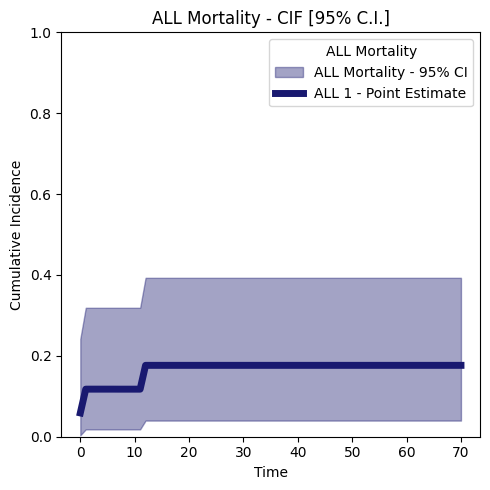

In [135]:
# Plot for ALL 1
plt.figure(figsize=(5, 5))
plt.fill_between(df['time_point'], df['ALL1_lower'], df['ALL1_upper'], color='midnightblue', alpha=0.4, label='ALL Mortality - 95% CI')
plt.plot(df['time_point'], df['ALL1'], 'midnightblue', label='ALL Mortality - Point Estimate', lw=5)
plt.title("ALL Mortality - CIF [95% C.I.]")
plt.xlabel("Time")
plt.ylabel("Cumulative Incidence")
plt.legend(title="ALL Mortality")
plt.ylim(0, 1)  # Set y-axis limit
plt.grid(False)
plt.tight_layout()
plt.show()


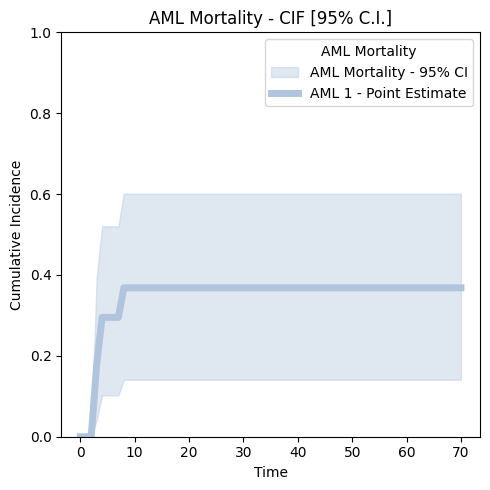

In [134]:
# Plot for AML 1
plt.figure(figsize=(5, 5))
plt.fill_between(df['time_point'], df['AML1_lower'], df['AML1_upper'], color='lightsteelblue', alpha=0.4, label='AML Mortality - 95% CI')
plt.plot(df['time_point'], df['AML1'], 'lightsteelblue', label='AML Mortality - Point Estimate', lw=5)
plt.title("AML Mortality - CIF [95% C.I.]")
plt.xlabel("Time")
plt.ylabel("Cumulative Incidence")
plt.legend(title="AML Mortality")
plt.ylim(0, 1)  # Set y-axis limit
plt.grid(False)
plt.tight_layout()
plt.show()


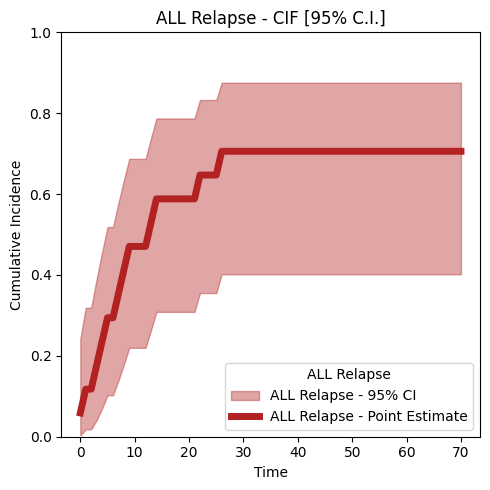

In [136]:
# Plot for ALL 2
plt.figure(figsize=(5, 5))
plt.fill_between(df['time_point'], df['ALL2_lower'], df['ALL2_upper'], color='firebrick', alpha=0.4, label='ALL Relapse - 95% CI')
plt.plot(df['time_point'], df['ALL2'], 'firebrick', label='ALL Relapse - Point Estimate', lw=5)
plt.title("ALL Relapse - CIF [95% C.I.]")
plt.xlabel("Time")
plt.ylabel("Cumulative Incidence")
plt.legend(title="ALL Relapse")
plt.ylim(0, 1)  # Set y-axis limit
plt.grid(False)
plt.tight_layout()
plt.show()


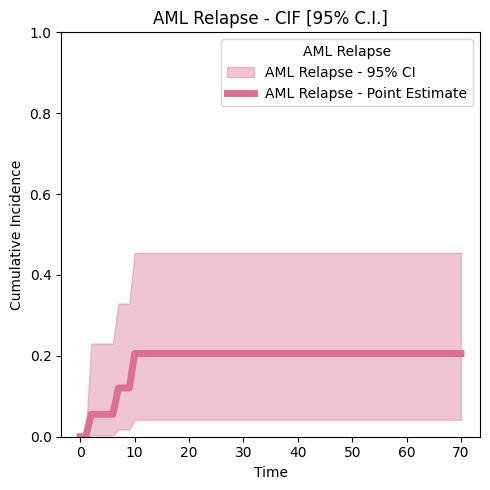

In [137]:
# Plot for AML 2
plt.figure(figsize=(5, 5))
plt.fill_between(df['time_point'], df['AML2_lower'], df['AML2_upper'], color='palevioletred', alpha=0.4, label='AML Relapse - 95% CI')
plt.plot(df['time_point'], df['AML2'], 'palevioletred', label='AML Relapse - Point Estimate', lw=5)
plt.title("AML Relapse - CIF [95% C.I.]")
plt.xlabel("Time")
plt.ylabel("Cumulative Incidence")
plt.legend(title="AML Relapse")
plt.ylim(0, 1)  # Set y-axis limit
plt.grid(False)
plt.tight_layout()
plt.show()